<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Feature_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Detection


(*Tutorial Rujukan: [Dokumentasi OpenCV untuk Feature Detection](https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html)*)


Pada bagian ini kita akan menggunakan teknik deteksi fitur dan matching untuk melakukan beberapa pengolahan citra dan memperoleh informasi. Ingat bahwa pengolahan citra perlu dilakukan secara bertahap dengan teknik yang boleh jadi berbeda pada kondisi yang berbeda. 

## Apa Itu Fitur ?

'Fitur' merupakan bagian dari citra yang dapat diidentifikasi dengan mudah oleh komputer. Sebagai contoh, pada gambar berikut: 

![alt text](https://drive.google.com/uc?id=1lDujYsNKdilG_d-Uv4gt0hzoPzBKDZ6q)

Manakah yang merupakan 'fitur' yang mudah untuk diidentifikasi?

Jawabnya adalah ujung persegi panjang yang ditandai oleh kotak berwarna merah. Kedua fitur lain cukup sulit untuk diidentifikasi:
*   Kotak warna biru dapat berada pada posisi manapun di dalam persegi panjang warna hijau
*   kotak warna hitam dapat berada dimana saja selama berada pada tepian persegi panjang.

Dengan demikian, sebuah citra dapat dilatih untuk mencari titik-titik yang mudah dilacak (*Good Features To Track*) dengan membuat kategori untuk tiap piksel dengan tetangga piksel masing-masing. 

Terdapat beberapa algoritma untuk melakukan deteksi pojok ('Corner Detector') dari sebuah citra digital. Beberapa yang cukup populer adalah:

*   [Harris Corner Detector](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)
*   [Shi-Tomasi dan Good Features to Track](https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_to

### Menggunakan Corner Detector

Lakukan latihan berikut menggunakan kedua metode yang tersedia pada OpenCV (Harris Corner dan Shi-Tomasi). Gunakan gambar yang berbeda dan bandingkan jumlah corner yang berhasil dideteksi oleh kedua algoritma tersebut.

In [ ]:
!wget https://pns2019.github.io/images/Lenna.png

--2022-03-12 12:55:47--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2022-03-12 12:55:47 (7.96 MB/s) - ‘Lenna.png’ saved [473831/473831]



jumlah titik terdeteksi =  690


(<matplotlib.image.AxesImage at 0x7f33fea3a9d0>,
 <function matplotlib.pyplot.show>)

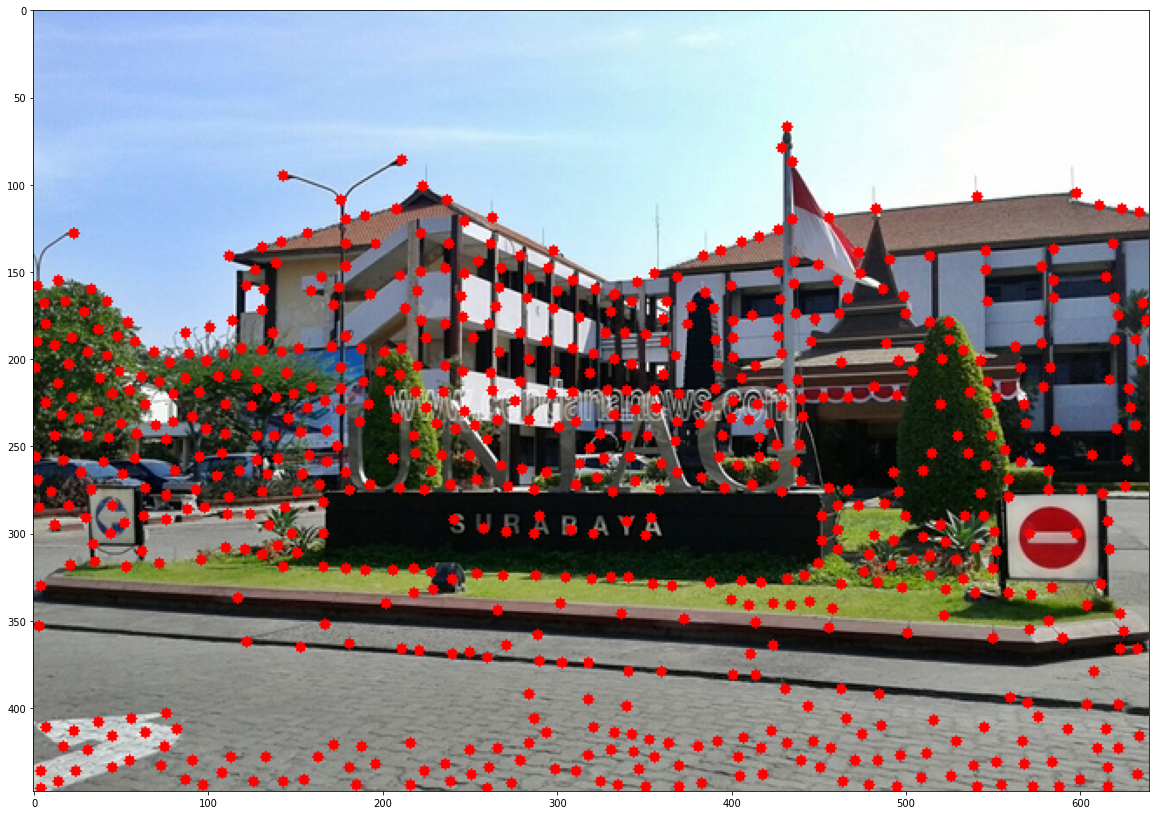

In [ ]:
# Menggunakan Shi-Tomasi GFTT untuk deteksi ujung (corner detection)

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# gunakan gambar yang disediakan di eLOK
img = cv2.imread('Untag Sby.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 


# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)

# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])

# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)

# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show


## Deteksi Keypoints (Feature Detection)

*(Rujukan: http://www.fossreview.com/2018/06/studying-digital-image-with-opencv4.html)*


---


Deteksi ujung (corner detection) dapat digunakan untuk 
mengidentifikasi fitur pada satu foto dengan baik. Namun demikian, metode ini kurang dapat digunakan dengan baik apabila diperlukan untuk mengidentifikasi titik yang sama pada foto yang berbeda. 

Sebagai contoh, pada gambar berikut:

![alt text](https://drive.google.com/uc?id=1c3g2BTFgSunu2BXqKLViVkr6u3pjT8Of)

Corner detection tidak akan banyak berguna untuk mencari titik-titik yang sama dan berpasangan pada kedua buah gambar (bayangkan '*tie-points*' pada fotogrametri). Hal ini disebabkan karena gambar kedua memiliki posisi yang berbeda (mengalami rotasi, translasi dan/atau skala), sehingga deteksi ujung tidak dapat digunakan. 

Gambar berikut menunjukkan kelemahan corner detector apabila digunakan pada gambar dengan perubahan skala (misalnya beda tinggi terbang foto udara)

![alt text](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/sift_scale_invariant.jpg)

Untuk itu, dikembangkan suatu metode untuk melakukan deteksi *keypoint* pada tiap foto. **Keypoint** dapat disebut sebagai sebuah 'basisdata' untuk tiap titik dengan karakteristik tertentu berdasarkan atas nilai piksel tetangganya. Dengan membentuk basisdata titik yang cukup detil, dua buah titik dapat saling dipasangkan apabila memiliki kemiripan yang cukup. Dengan demikian, matriks homography dapat dihitung dan rekonstruksi posisi foto dapat dilakukan sebagaimana materi yang telah disampaikan sebelumnya.

Pada OpenCV, terdapat beberapa fungsi deteksi keypoints, antara lain:

*   [SIFT (Scale-Invariant Feature Transform)](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html). Merupakan metode yang paling terkenal dan banyak digunakan
*   [SURF (Speeded-Up Robust Feature)](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html).
* [FAST](https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html) 
* [BRIEF (Binary Robust Independent Elementary Features)](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html). Merupakan descriptor yang digunakan untuk menghitung hasil deteksi secara lebih efisien. BRIEF seringkali dipasangkan dengan FAST.
* [ORB (Oriented FAST and Rotated BRIEF)](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html), merupakan alternatif gratis untuk SIFT dan SURF (keduanya memiliki paten)
* [A-KAZE](https://docs.opencv.org/3.4/db/d70/tutorial_akaze_matching.html). Salah satu feature detector terbaru yang banyak digunakan di software SfM Opensource


Fungsi-fungsi di atas dapat dipanggil dengan menggunakan fungsi features2d pada OpenCV sebagai berikut:

```
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

# FAST dan BRIEF
# FAST detector
star = cv.xfeatures2d.StarDetector_create()
# BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
```

Karena algoritma SIFT dan SURF dipatenkan dan berbayar sedangkan OpenCV adalah perangkat lunak opensource, mulai OpenCV versi 4 semua fungsi tersebut dipisahkan dari modul utama OpenCV. Dengan demikian, untuk menggunakan fungsi tersebut dapat digunakan OpenCV versi lama (Versi 3) yang masih mengandung modul SIFT dan SURF.

### Menggunakan ORB dan KAZE

ORB dan KAZE merupakan contoh feature detector yang bersifat *opensource*, sehingga dapat digunakan secara gratis pada OpenCV. 

Lakukan latihan berikut dengan gambar yang berbeda. Apabila script menggunakan gambar grayscale, tampilkan gambar berwarna dengan menggunakan Matplotlib.

jumlah titik terdeteksi =  1730


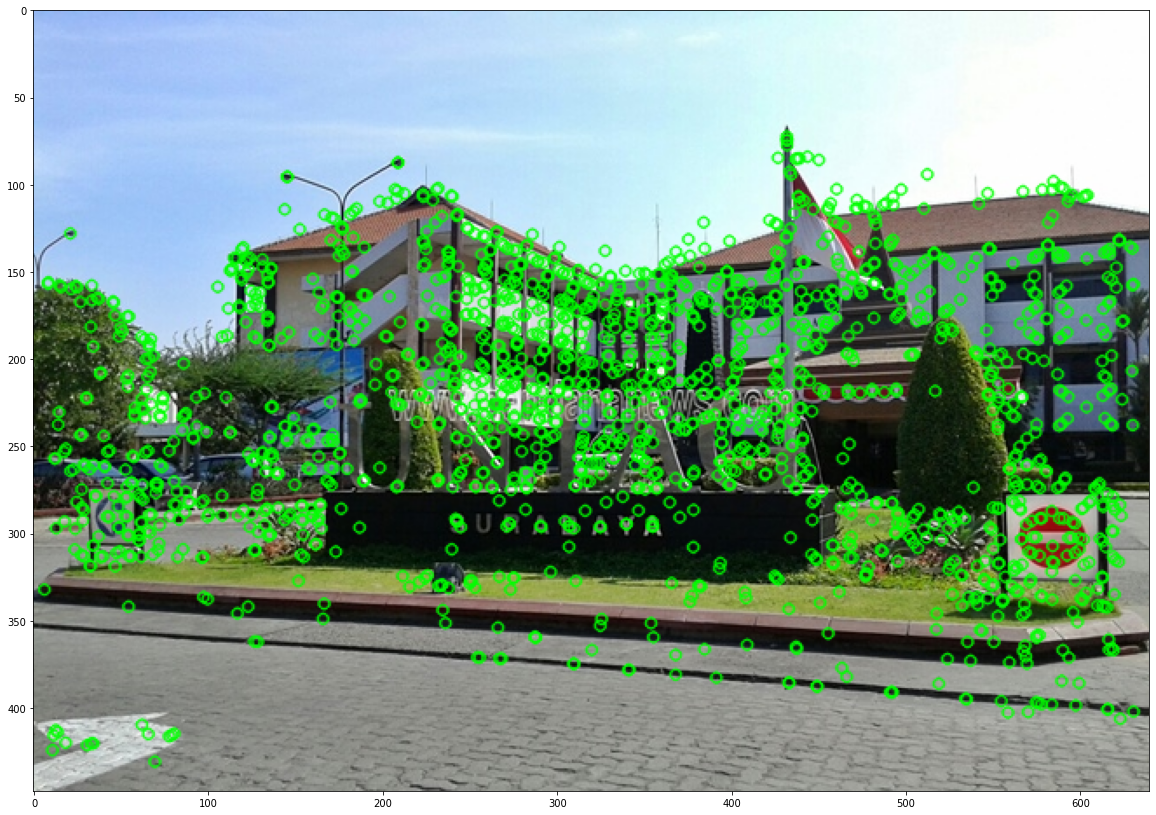

(<matplotlib.image.AxesImage at 0x7f33ef402bd0>, None)

In [ ]:
# Mendownload gambar Lenna untuk contoh
#!wget https://pns2019.github.io/images/Lenna.png

import cv2
import numpy as np

# memanggil gambar berwarna
img = cv2.imread('Untag Sby.jpg')

# cara lain memanggil grayscale dari gambar
#img = cv2.imread('gedungpusat.jpg',0)
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mendefinisikan KAZE descriptor
kaze = cv2.KAZE_create()
kp = kaze.detect(gray)

#kps = sorted(kp, key=lambda x: -x.response)[:32]

# computing descriptors vector
kp, dsc = kaze.compute(gray, kp)

# berapa titik yang terdeteksi?
print("jumlah titik terdeteksi = ", len(kp))

# menggambar keypoint yang berhasil diidentifikasi
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.drawKeypoints(img_rgb, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

Contoh di atas menggunakan KAZE untuk mendeteksi titik. Ingat bahwa **keypoint** yang dihasilkan di proses ini berbeda dengan **corner** yang kita peroleh pada saat menggunakan corner detector seperti Harris di atas. Keypoint merupakan basisdata titik yang juga mengandung informasi mengenai piksel di sekitarnya sehingga kita dapat memasangkan tiap keypoint ini meskipun dideteksi pada foto yang berbeda.

Contoh di bawah menggunakan ORB untuk mendeteksi keypoint. Apa yang dapat Anda amati?

jumlah titik terdeteksi =  500


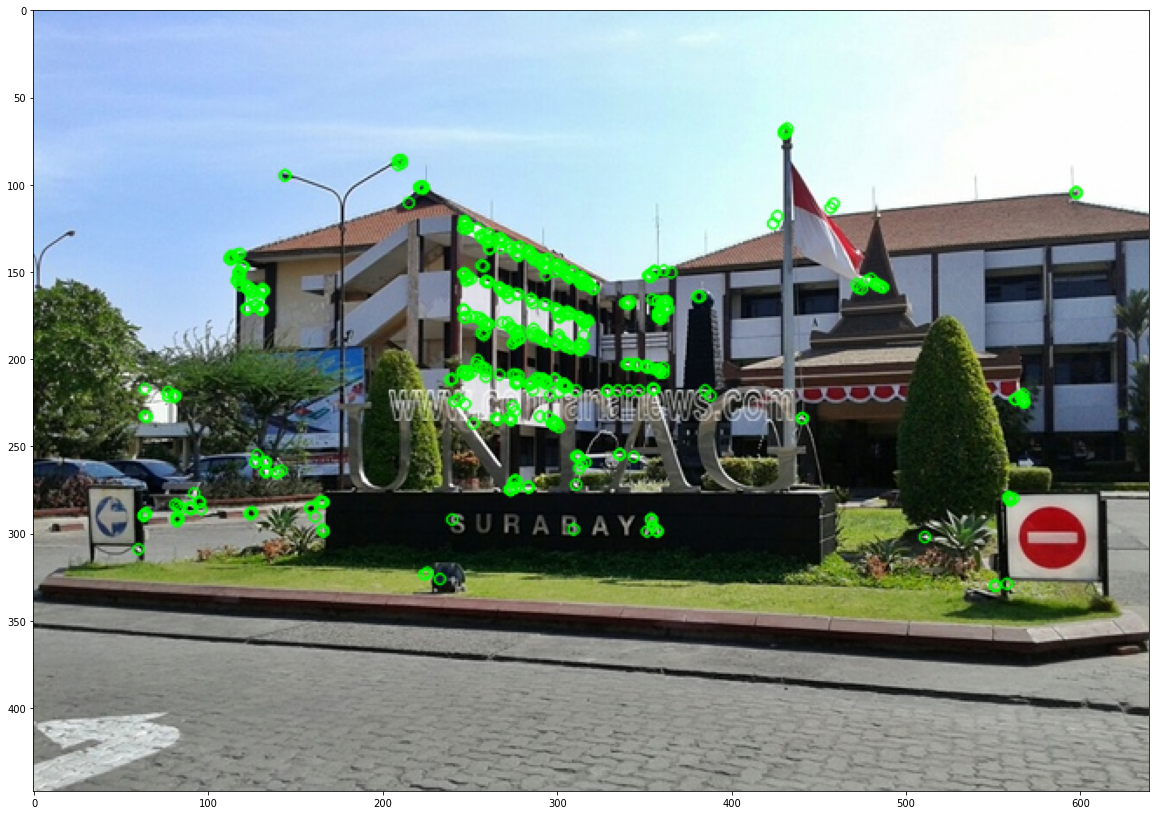

(<matplotlib.image.AxesImage at 0x7f33ef170350>, None)

In [ ]:
# Latihan ORB

import numpy as np
import cv2 
from matplotlib import pyplot as plt

# membaca citra
img = cv2.imread('Untag Sby.jpg',0)

# membuat ORB detector
orb = cv2.ORB_create()

# kp: variabel untuk menyimpan keypoint yang berhasil dideteksi
kp = orb.detect(img,None)

# menghitung deskriptor
# kp = keypoints
# des = descriptor
kp, des = orb.compute(img, kp)

# berapa jumlah titik terdeteksi?
print("jumlah titik terdeteksi = ", len(kp))

# menggambar keypoint yang berhasil diidentifikasi 
img2 = cv2.drawKeypoints(img_rgb, kp, None, color=(0,255,0), flags=0)  # img_rbg dari variabel sebelumnya di atas
plt.imshow(img2), plt.show()